In [1]:

import qiskit
qiskit.__qiskit_version__
from qiskit import IBMQ
IBMQ.save_account('cf9905df08d4ad675788fc022e45c8e757ae1aad60af6cb9c29cff3bbafce995db8bf9f1e5a184579bbfb63d9165cb5277e2feeb75a0c0633de921f44cd181a3')
IBMQ.load_account()

configrc.store_credentials:WARNING:2021-09-01 10:18:15,911: Credentials already present. Set overwrite=True to overwrite.
C:\Users\cyrus\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
from qiskit import *

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

circuit.x(qr[1])
circuit.x(qr[0])
circuit.cx(qr[0],qr[1])
circuit.h(qr[1])
circuit.z(qr[0])

circuit.measure(qr,cr)
%matplotlib inline

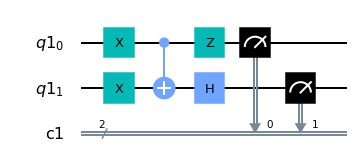

In [5]:
circuit.draw(output = 'mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')

In [7]:
result = execute(circuit, backend = simulator).result()

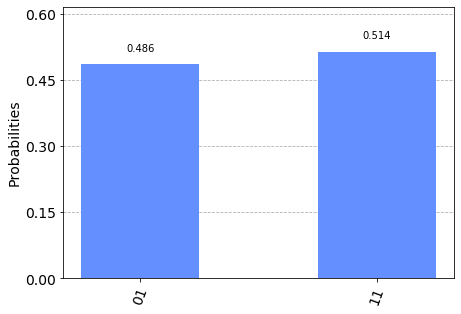

In [8]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [9]:
IBMQ.load_account()

C:\Users\cyrus\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-09-01 10:58:22,069: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = IBMQ.get_provider('ibm-q')

In [14]:
qcomp = provider.get_backend('ibmq_santiago')

Job Status: job has successfully run


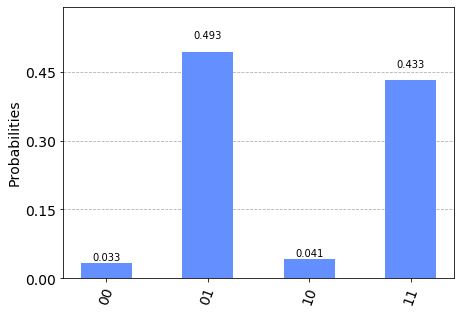

In [15]:
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
plot_histogram(result.get_counts(circuit))